<a href="https://colab.research.google.com/github/Edu963/python_projects/blob/main/SPX500Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Download Libraries to Use
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Download historical S&P 500 data
sp500_data = yf.download('^GSPC', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [20]:
print(sp500_data)

    Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4      ACN             Accenture  Information Technology   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry    Headquarters Location  Date added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment

In [18]:
# Define the date range for 2023
start_date = '2023-01-01'
end_date = '2023-12-29'

# Get the list of S&P 500 companies and their sectors
sp500_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = sp500_data['Symbol'].tolist()
sp500_sectors = sp500_data['GICS Sector'].tolist()

# Create a DataFrame with tickers and sectors
sp500_sectors_df = pd.DataFrame({'Ticker': sp500_tickers, 'Sector': sp500_sectors})

# Group companies by sector
grouped_companies = sp500_sectors_df.groupby('Sector')

# Download financial data for each sector
company_data_by_sector = pd.DataFrame()

for sector, companies in grouped_companies:
    for index, row in companies.iterrows():
        ticker = row['Ticker']

        try:
            data = yf.download(ticker, start=start_date, end=end_date, progress=False)

            # Add additional financial metrics if needed
            data['Ticker'] = ticker
            data['Sector'] = sector

            company_data_by_sector = pd.concat([company_data_by_sector, data], axis=0)
        except Exception as e:
            print(f"Error downloading data for {ticker}: {e}")

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-12-29)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [14]:
# Print the first few rows of the data
print(company_data_by_sector.head())

                 Open       High        Low      Close  Adj Close      Volume  \
Date                                                                            
2023-01-03  89.589996  91.050003  88.519997  89.120003  89.120003  28131200.0   
2023-01-04  90.349998  90.650002  87.269997  88.080002  88.080002  34854800.0   
2023-01-05  87.470001  87.570000  85.900002  86.199997  86.199997  27194400.0   
2023-01-06  86.790001  87.690002  84.860001  87.339996  87.339996  41381500.0   
2023-01-09  88.360001  90.050003  87.860001  88.019997  88.019997  29003900.0   

           Ticker                  Sector  
Date                                       
2023-01-03  GOOGL  Communication Services  
2023-01-04  GOOGL  Communication Services  
2023-01-05  GOOGL  Communication Services  
2023-01-06  GOOGL  Communication Services  
2023-01-09  GOOGL  Communication Services  


In [19]:
# Create a DataFrame to store the performance of each stock
performance_data = pd.DataFrame()

# Calculate the percentage change for each stock
for ticker in sp500_tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)

        # Calculate the percentage change
        data['Percentage Change'] = data['Close'].pct_change()

        # Get the cumulative percentage change for the year
        cumulative_percentage_change = (1 + data['Percentage Change']).cumprod() - 1

        # Store the cumulative percentage change in the DataFrame
        performance_data[ticker] = cumulative_percentage_change
    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")
# Find the 5 best performers
best_performers = performance_data.iloc[-1].sort_values(ascending=False).head(5)

# Find the 5 worst performers
worst_performers = performance_data.iloc[-1].sort_values().head(5)

# Format the results as percentage
best_performers = (best_performers * 100).round(2)
worst_performers = (worst_performers * 100).round(2)

# Display the results
print("5 Best Performers:")
print(best_performers)

print("\n5 Worst Performers:")
print(worst_performers)

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-12-29)')
<ipython-input-19-15b74981ac05>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  performance_data[ticker] = cumulative_percentage_change
<ipython-input-19-15b74981ac05>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  performance_data[ticker] = cumu

5 Best Performers:
NVDA    245.94
META    187.25
RCL     166.82
BLDR    158.09
UBER    148.97
Name: 2023-12-28 00:00:00, dtype: float64

5 Worst Performers:
FMC    -49.32
ENPH   -46.79
DG     -45.06
MRNA   -44.81
PFE    -43.84
Name: 2023-12-28 00:00:00, dtype: float64


<ipython-input-19-15b74981ac05>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  performance_data[ticker] = cumulative_percentage_change
<ipython-input-19-15b74981ac05>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  performance_data[ticker] = cumulative_percentage_change


In [22]:
#Download historical data for S&P 500 index
sp500_history = yf.download('^GSPC', start=start_date, end=end_date, progress=False)

# Calculate the percentage change for the S&P 500 index
sp500_history['Percentage Change'] = sp500_history['Close'].pct_change()

# Get the cumulative percentage change for the S&P 500 index
sp500_cumulative_percentage_change = (1 + sp500_history['Percentage Change']).cumprod() - 1

# Format the result as percentage
sp500_cumulative_percentage_change = (sp500_cumulative_percentage_change * 100).round(2)

# Display the result
print("Cumulative Percentage Change for S&P 500 in 2023:")
print(sp500_cumulative_percentage_change)

Cumulative Percentage Change for S&P 500 in 2023:
Date
2023-01-03      NaN
2023-01-04     0.75
2023-01-05    -0.42
2023-01-06     1.86
2023-01-09     1.78
              ...  
2023-12-21    24.13
2023-12-22    24.33
2023-12-26    24.86
2023-12-27    25.04
2023-12-28    25.08
Name: Percentage Change, Length: 249, dtype: float64


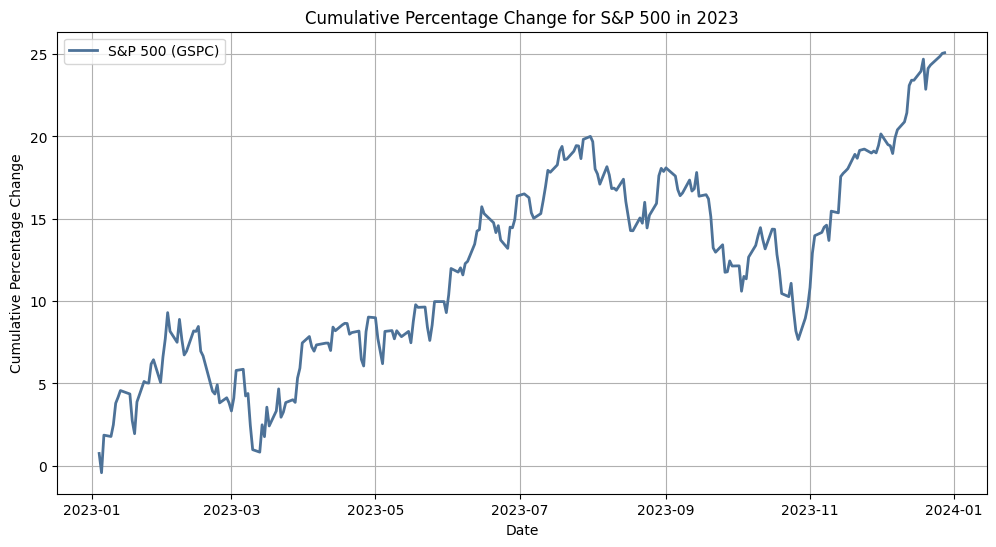

In [26]:


# Define the date range for the year 2023
start_date = '2023-01-01'
end_date = '2023-12-29'



# Plot the cumulative percentage change for the S&P 500
plt.figure(figsize=(12, 6))
plt.plot(sp500_cumulative_percentage_change.index, sp500_cumulative_percentage_change, label='S&P 500 (GSPC)', color='#4d7298', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Cumulative Percentage Change')
plt.title('Cumulative Percentage Change for S&P 500 in 2023')
plt.legend()
plt.grid(True)
plt.show()


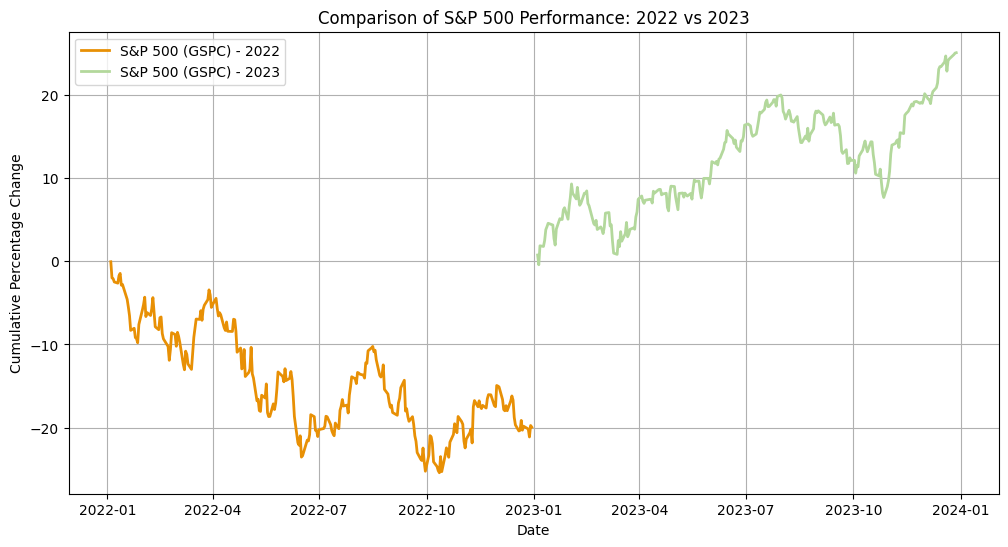

In [27]:
# Define the date range for 2022 and 2023
start_date_2022 = '2022-01-01'
end_date_2022 = '2022-12-31'

start_date_2023 = '2023-01-01'
end_date_2023 = '2023-12-31'

# Download historical data for S&P 500 index for 2022 and 2023
sp500_history_2022 = yf.download('^GSPC', start=start_date_2022, end=end_date_2022, progress=False)
sp500_history_2023 = sp500_history

# Calculate the percentage change for each day for 2022 and 2023
sp500_percentage_change_2022 = sp500_history_2022['Close'].pct_change()
sp500_percentage_change_2023 = sp500_history_2023['Close'].pct_change()

# Calculate the cumulative percentage change for 2022 and 2023
sp500_cumulative_percentage_change_2022 = (1 + sp500_percentage_change_2022).cumprod() - 1
sp500_cumulative_percentage_change_2023 = (1 + sp500_percentage_change_2023).cumprod() - 1

# Format the results as percentage
sp500_cumulative_percentage_change_2022 = (sp500_cumulative_percentage_change_2022 * 100).round(2)
sp500_cumulative_percentage_change_2023 = (sp500_cumulative_percentage_change_2023 * 100).round(2)

# Plot the cumulative percentage change for 2022 and 2023
plt.figure(figsize=(12, 6))
plt.plot(sp500_cumulative_percentage_change_2022, label='S&P 500 (GSPC) - 2022', color = '#e89005', linewidth = 2)
plt.plot(sp500_cumulative_percentage_change_2023, label='S&P 500 (GSPC) - 2023', color = '#b3d89c', linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Cumulative Percentage Change')
plt.title('Comparison of S&P 500 Performance: 2022 vs 2023')
plt.legend()
plt.grid(True)
plt.show()


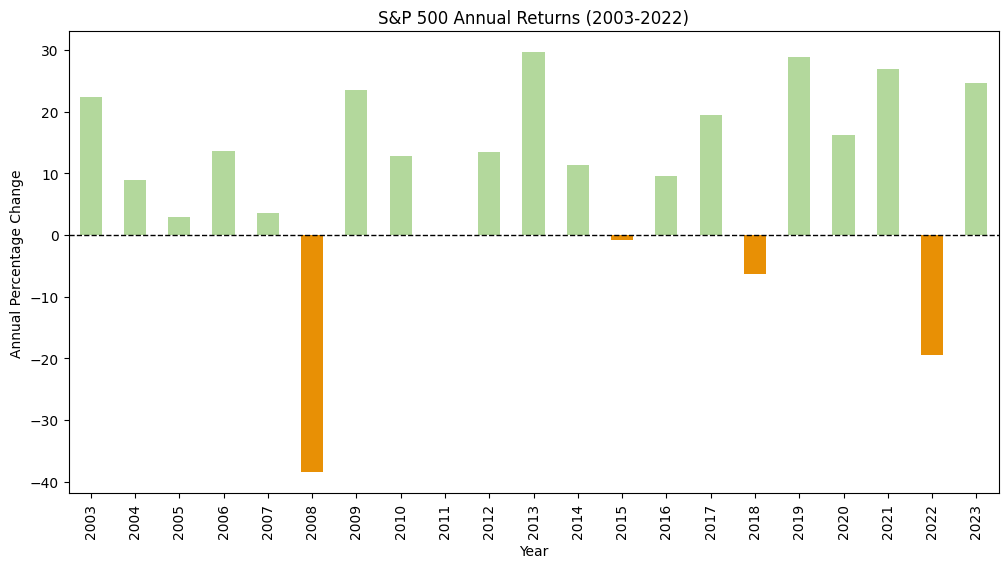

In [34]:
# Define the date range for the past 20 years
start_date = '2003-01-01'
end_date = '2023-12-29'

# Download historical data for S&P 500 index
sp500_history = yf.download('^GSPC', start=start_date, end=end_date, progress=False)

# Calculate the daily percentage change
sp500_daily_percentage_change = sp500_history['Close'].pct_change()
# Calculate the daily percentage change
sp500_daily_percentage_change = sp500_history['Close'].pct_change()
# Calculate the annualized percentage change
sp500_annual_percentage_change = sp500_daily_percentage_change.groupby(sp500_daily_percentage_change.index.year).apply(lambda x: (1 + x).prod() - 1) * 100

# Plot the annual returns with color based on value
plt.figure(figsize=(12, 6))
colors = ['#e89005' if val < 0 else '#b3d89c' for val in sp500_annual_percentage_change]
sp500_annual_percentage_change.plot(kind='bar', color=colors)
plt.xlabel('Year')
plt.ylabel('Annual Percentage Change')
plt.title('S&P 500 Annual Returns (2003-2022)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at 0 for reference
plt.show()


In [36]:
# Calculate the average annual return
average_annual_return = sp500_annual_percentage_change.mean()

print(f"Average Annual Return of S&P 500 (GSPC) over the past 20 years: {average_annual_return:.2f}%")

Average Annual Return of S&P 500 (GSPC) over the past 20 years: 9.66%
